# 

# Introduction to Bayesian inference

## Introduction

### Today’s topics

1.  [What is Bayesian statistical
    inference?](#what-is-bayesian-statistical-inference)
2.  [Why is it useful?](#why-is-bayesian-statistical-inference-useful)
3.  [The big challenge](#the-big-challenge)

### Computer goals

Set up git/ssh, Python, cmdstanpy and cmdstan

# What is Bayesian statistical inference?

## Probability function

<figure id="fig-jug">
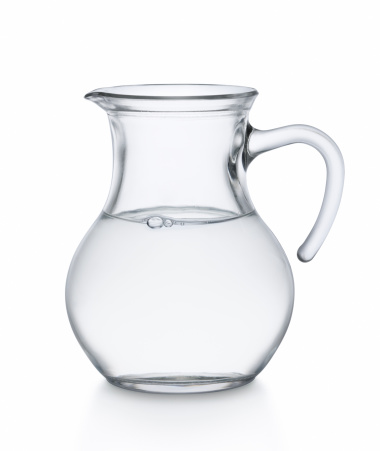
<figcaption>Figure 1: A jug of water</figcaption>
</figure>

A function that can measure the water in a jug.

i.e.

$p: S \rightarrow [0,1]$ where

-   $S$ is an [event
    space](https://en.wikipedia.org/wiki/Event_(probability_theory)#Events_in_probability_spaces)
-   If $A, B \in S$ are disjoint, then $p(A\cup B) = p(A) + p(B)$

## Bayesian epistemology

Probability functions can describe belief, e.g.

“Definitely B”:

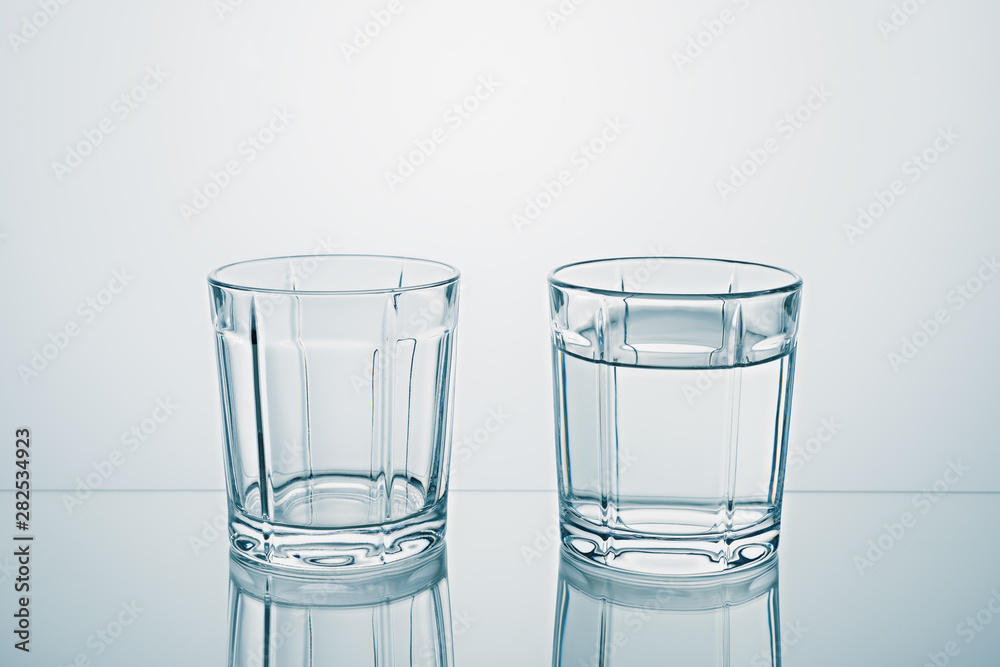

“Not sure if A or B”:

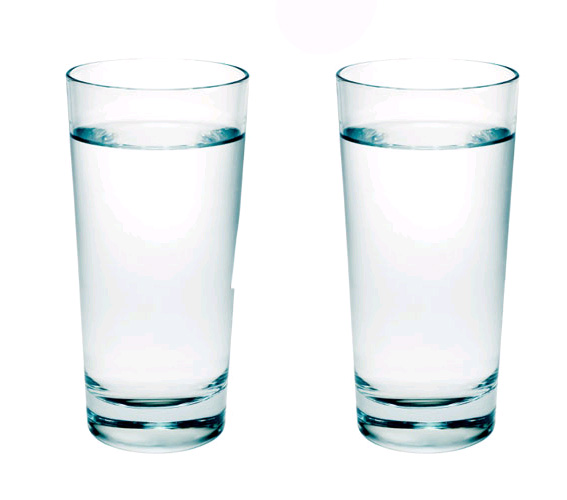

“B a bit more plausible than A”:

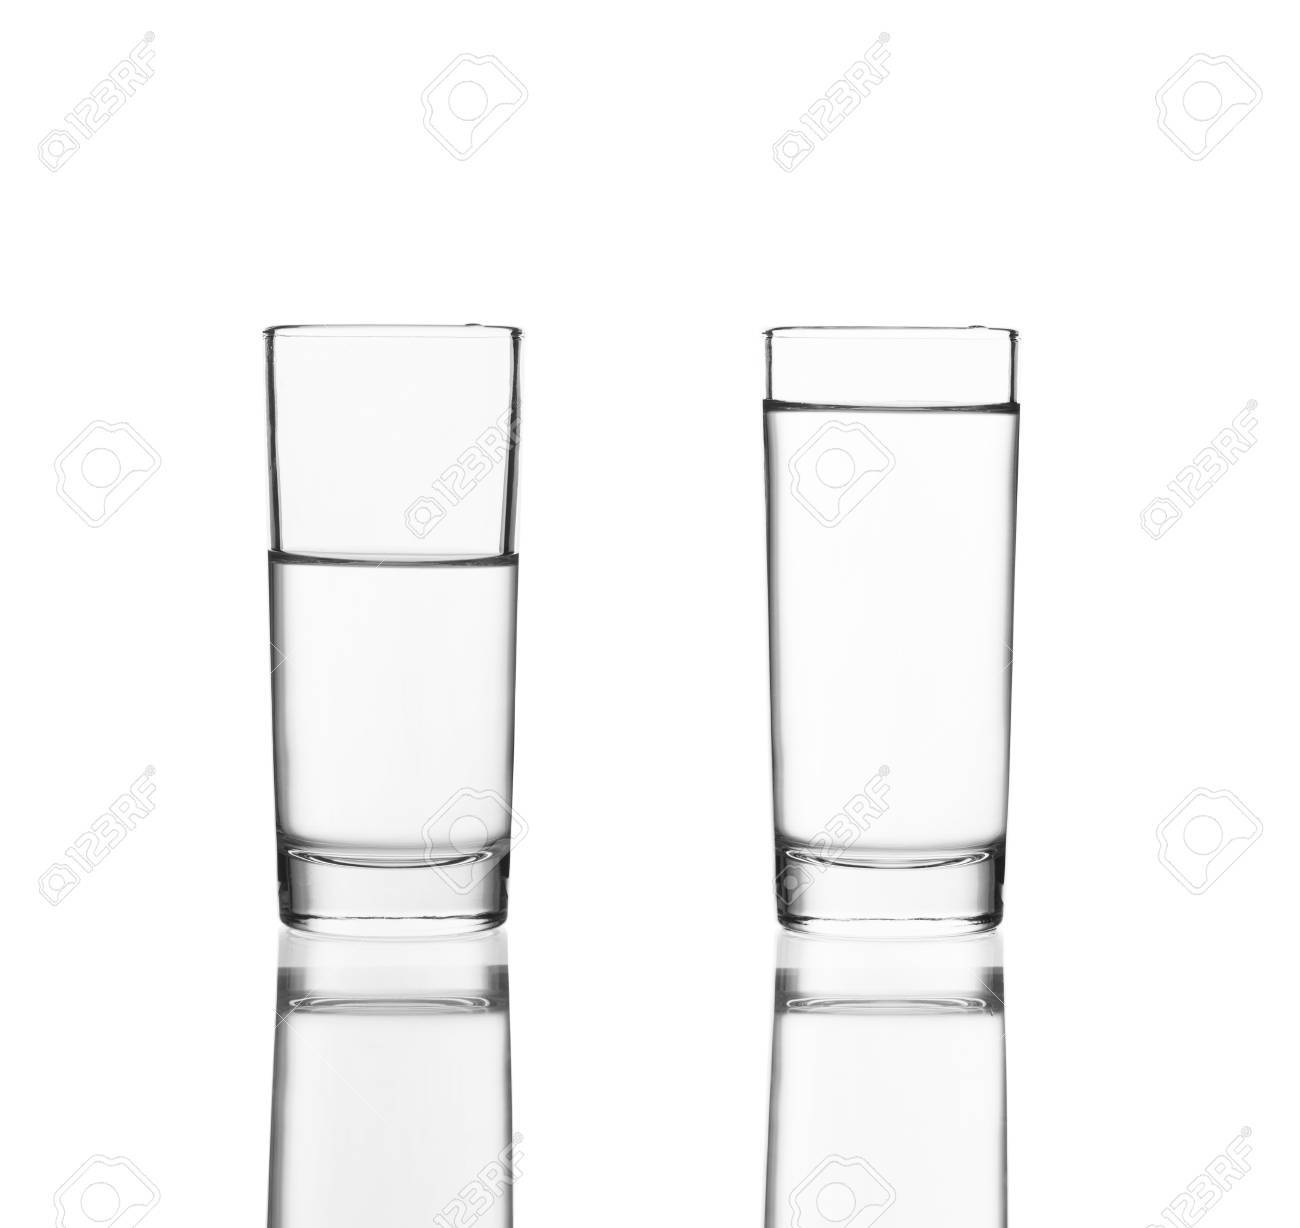

## Statistical Inference

<figure id="fig-soup">
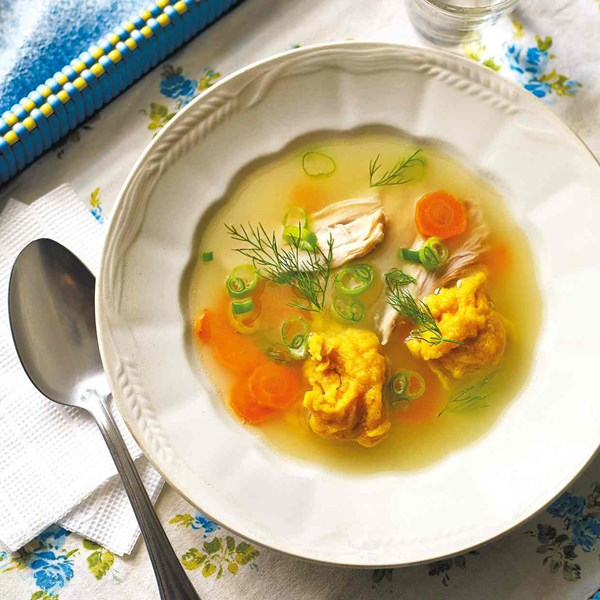
<figcaption>Figure 2: A nice soup: <a
href="https://www.theguardian.com/lifeandstyle/2017/jan/24/20-best-one-pot-recipes-part-2-tom-kerridge-nigella-lawson-broths-hangover-food">here
is the recipe</a></figcaption>
</figure>

In: facts about a ~~spoonful~~ sample

Out: propositions about a ~~soup~~ population

e.g.

-   spoonful not salty $\rightarrow$ soup not salty
-   no carrots in spoon $\rightarrow$ no carrots in soup

## Bayesian statistical inference

<figure id="fig-soup-jug">
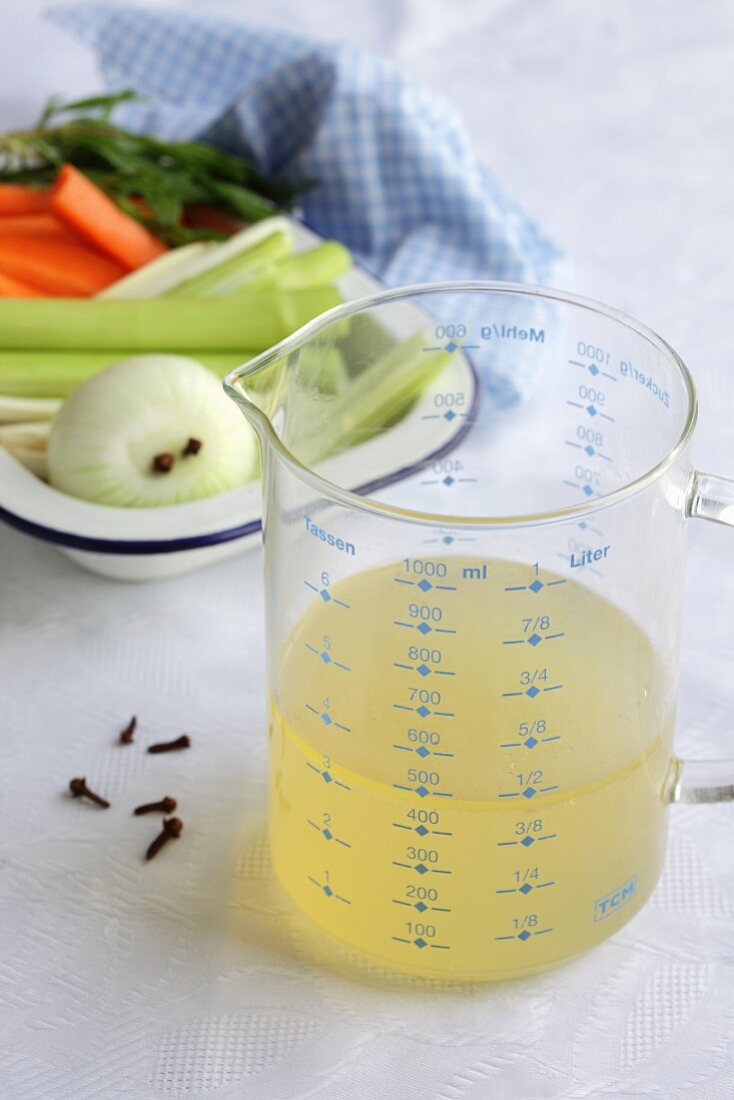
<figcaption>Figure 3: A jug of soup</figcaption>
</figure>

Statistical inference resulting in a probability.

e.g.

-   spoon $\rightarrow$ $p(\text{soup not salty})$ = 99.9%
-   spoon $\rightarrow$ $p(\text{no carrots in soup})$ = 95.1%

Non-Bayesian inferences:

-   spoon $\rightarrow$ Best estimate of \[salt\] is 0.1mol/l
-   $p_{null}(\text{spoon})$ = 4.9% $\rightarrow$ no carrots (p=0.049)

# Why is Bayesian statistical inference useful?

## General reasons

### Easy to interpret

[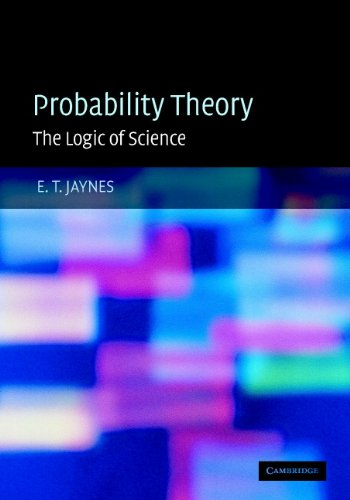](https://readyforai.com/download/probability-theory-the-logic-of-science-pdf/)

Figure 4: It’s a good book!

Bayesian inference produces probabilities, which can be interpreted in
terms of information and plausible reasoning.

e.g. “According to the model…”

-   “…x is highly plausible.”
-   “…x is more plausible than y.”
-   “…the data doesn’t contain enough information for firm conclusions
    about x.”

### Old

<figure>
<a href="https://en.wikipedia.org/wiki/Pierre-Simon_Laplace"
height="80%">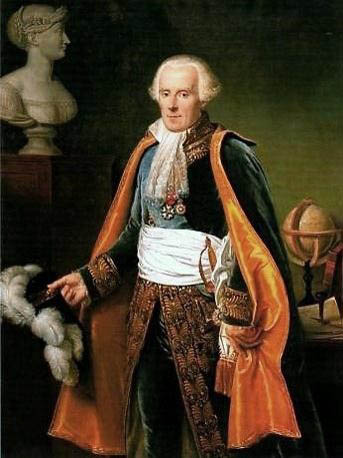</a>
<figcaption>(https://en.wikipedia.org/wiki/Pierre-Simon_Laplace)</figcaption>
</figure>

Figure 5: Laplace, who did Bayesian inference in the 1780s

Bayesian inference is old!

This means

-   it is well understood mathematically.
-   conceptual surprises are relatively rare.
-   there are many compatible frameworks.

### An easy way to represent your information

Probabilities decompose nicely:

$$
p(\theta, y) = p(\theta)p(y\mid\hat{y}(\theta))
$$

-   $p(\theta)$: nice form for *background* information, e.g. anything
    non-experimental
-   $\hat{y}(\theta)$: nice form for *structural* information,
    e.g. physical laws
-   $p(y\mid\hat{y}(\theta))$: nice form for *measurement* information,
    e.g. instrument accuracy

## Reasons specific to computational biology

### Regression models: good for describing measurements

Regression: measured value noisily depends on the true value
e.g. $y \sim N(\hat{y}, \sigma)$.

Biology experiments often have measurement processes with awkward
features. e.g.

-   heteroskedasticity (amount of noise depends on measured value)
-   constraints (e.g. non-negativity, compositionality)
-   unknown latent bias (e.g. the pump is supposed to add $0.05cm^3$ per
    min, but does it?)

Bayesian inference is good at describing these.

### Multi-level models: good for describing sources of variation

<figure id="fig-baseball">
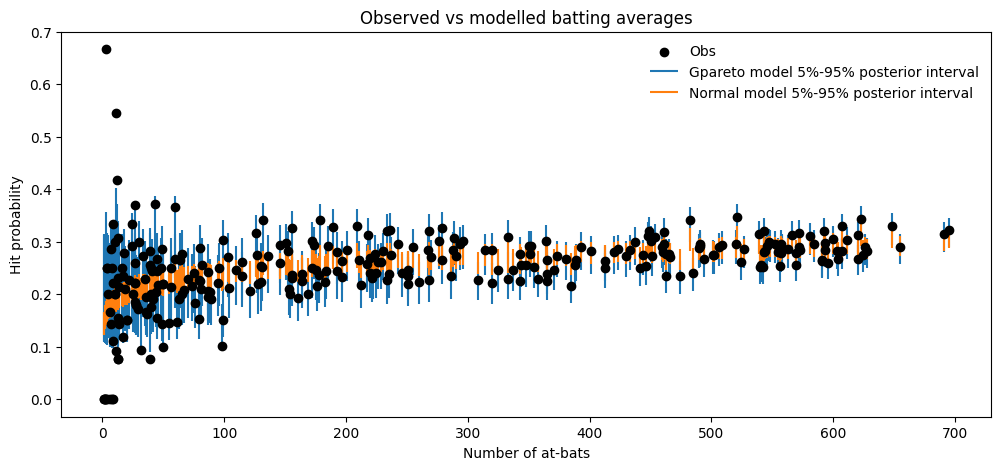
<figcaption>Figure 6: plot from <a
href="https://github.com/teddygroves/baseball"
class="uri">https://github.com/teddygroves/baseball</a></figcaption>
</figure>

Measurement model:

$y \sim binomial(K, logit(ability))$

Gpareto model:

$ability \sim GPareto(m, k, s)$

Normal model:

$ability \sim N(\mu, \tau)$

### Generative models: good for representing structural information

<figure id="fig-lotka-volterra">
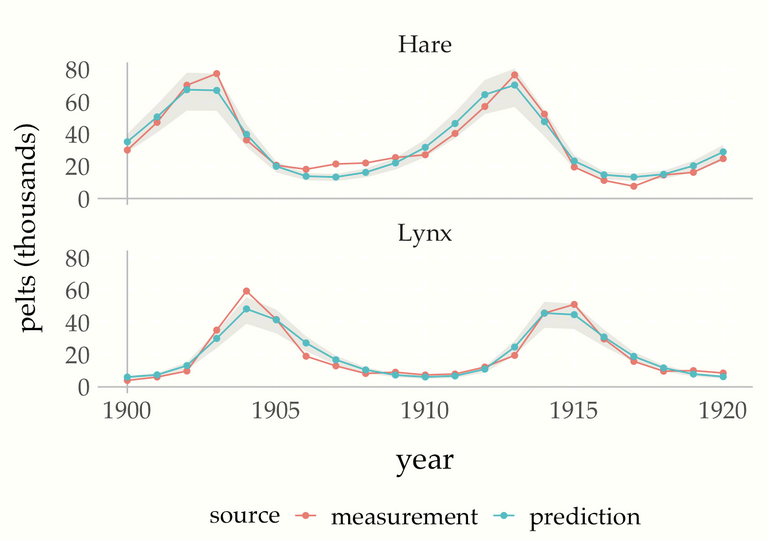
<figcaption>Figure 7: From a <a
href="https://mc-stan.org/users/documentation/case-studies/lotka-volterra-predator-prey.html">Stan
case study</a></figcaption>
</figure>

Information about hares ($u$) and lynxes ($v$):

i.e. a deterministic function turning $\alpha$, $\beta$, $\gamma$,
$\delta$, $u(0)$ and $v(0)$ into $u(t)$ and $v(t)$.

# The big challenge

$p(\theta \mid y)$ is easy to evaluate but hard to integrate.

This is bad as we typically want something like

$$
p([salt] < 0.1, spoon=s)
$$

which is equivalent to

$$
\int_{0}^{0.1}p([salt], spoon=s)d[salt]
$$

$p(\theta \mid y)$ has one dimension per model parameter.

## The solution: MCMC

<figure id="fig-mcmc">
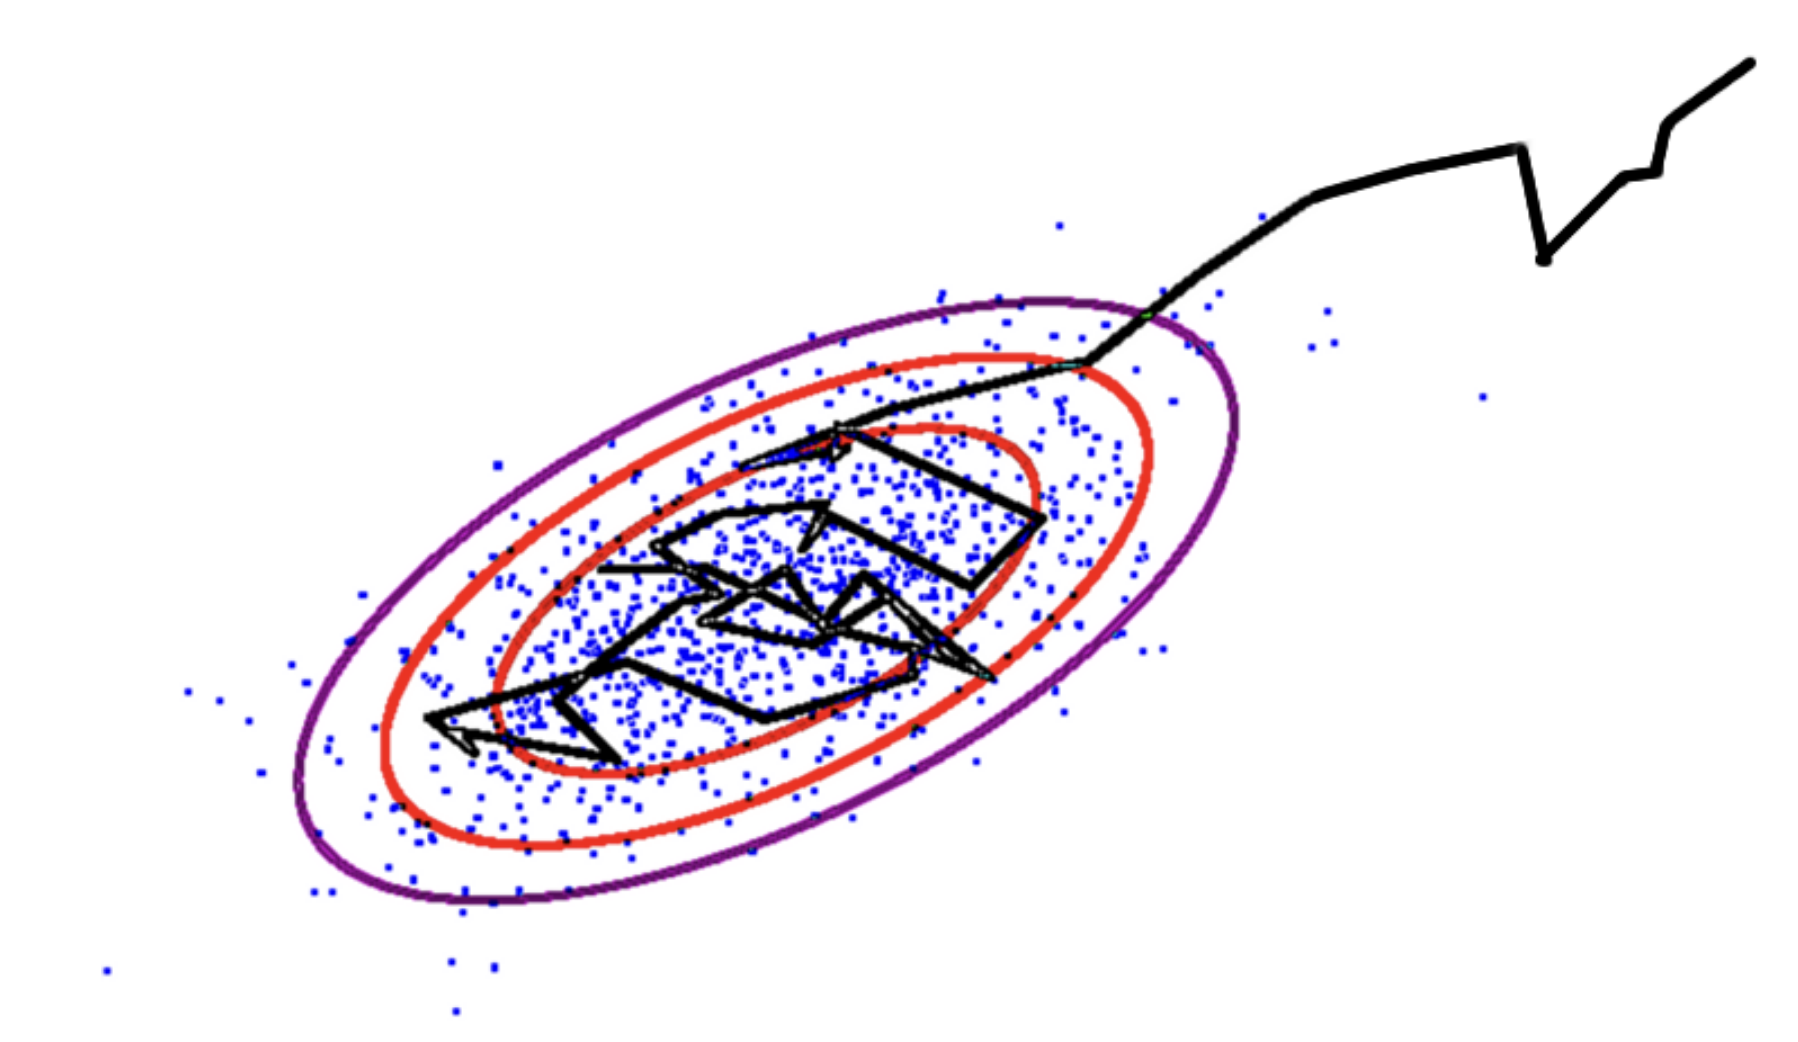
<figcaption>Figure 8: An image I found <a
href="http://mlg.eng.cam.ac.uk/tutorials/06/im.pdf">online</a></figcaption>
</figure>

Strategy:

1.  Find a series of numbers that
    -   quickly finds the high-probabiliy region in parameter space
    -   reliably matches its statistical properties
2.  Do sample-based approximate integration.

It (often) works!

We can tell when it doesn’t work!

# Homework

## Things to read

Box and Tiao (1992, Ch. 1.1) (available from dtu findit) gives a nice
explanation of statistical inference in general and why Bayes.

Historical interest:

-   Laplace (1986) and Stigler (1986)
-   Jaynes (2003) Preface

## Things to set up

### Python

First get a recent (ideally 3.11+) version of Python This can be very
annoying so talk to me if necessary!

Next get used to Python virtual environments.

The method I like is to put the virtual environment in a folder `.venv`
inside the root of my project:

``` shell
$ python -m venv .venv --prompt=bscb
```

Then to use: <span class="column-margin margin-aside">Tip: use an
ergonomic alias to activate venvs
e.g. `alias va="source .venv/bin/activate"`</span>

``` shell
$ source .venv/bin/activate
# ... do work
$ deactivate
```

### Git and ssh

``` shell
git clone git@github.com:teddygroves/bayesian_statistics_for_systems_biologists.git
```

### Cmdstanpy and cmdstan

First install them:

``` shell
$ pip install cmdstanpy
$ python -m cmdstanpy.instsall_cmdstan
```

Now test if they work

``` python
from cmdstanpy import CmdStanModel
filename = "example_stan_program.stan" 
code = "data {} parameters {real t;} model {t ~ std_normal();}"
with open(filename, "w") as f:
    f.write(code)
model = CmdStanModel(stan_file=filename)
mcmc = model.sample()
```

# Next time

## Theory

Hamiltonian Monte Carlo:

-   what?
-   why?

MCMC diagnostics

## Computer

Stan, cmdstanpy, arviz:

-   formats
-   workflow
-   write a model

# References

Box, George E. P., and George C. Tiao. 1992. “Bayesian Inference in
Statistical Analysis.” A Wiley-Interscience Publication. New York:
Wiley.
<https://onlinelibrary-wiley-com.proxy.findit.cvt.dk/doi/epdf/10.1002/9781118033197>.

Jaynes, E. T. 2003. “Probability Theory: The Logic of Science.” Edited
by G. Larry Bretthorst. Cambridge, UK:
<https://readyforai.com/download/probability-theory-the-logic-of-science-pdf/>;
Cambridge University Press.

Laplace, Pierre Simon. 1986. “Memoir on the Probability of the Causes of
Events.” *Statistical Science* 1 (3).
<https://doi.org/10.1214/ss/1177013621>.

Stigler, Stephen M. 1986. “Laplace’s 1774 Memoir on Inverse
Probability.” *Statistical Science* 1 (3).
<https://doi.org/10.1214/ss/1177013620>.